In [ ]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

# 필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# 🗂️ Step 2: 데이터 불러오기

# CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [ ]:
# 여기에서 확인해 보세요.
print(f"train_images 구조: {train_images.shape}")  # 학습 이미지 (5만장)
print(f"train_labels 구조: {train_labels.shape}")  # 학습 이미지의 레이블

print(f"test_images 구조: {test_images.shape}")  # 테스트 이미지 (1만장)
print(f"test_labels 구조: {test_labels.shape}")  # 테스트 이미지의 레이블

train_images 구조: (50000, 32, 32, 3)
train_labels 구조: (50000, 1)
test_images 구조: (10000, 32, 32, 3)
test_labels 구조: (10000, 1)


In [ ]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요.
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(128))  # TODO: 은닉층 유닛 수 설정
model.add(layers.BatchNormalization())
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요.
(padding은 디폴트로 없습니다.)

Answer: <br>
Input = (32, 32, 3) <br>
Conv2D(32, (3, 3)) = (30, 30, 32)  # input_size - kernel_size + 1 <br>
MaxPooling(2, 2) = (15, 15, 32)  # 2*2 풀링, 입력의 절반<br>
Conv2D(64, (3, 3)) = (13, 13, 64) <br>
MaxPooling(2, 2) = (6, 6, 64) <br>
Conv2D(64, (3, 3)) = (4, 4, 64) <br>
Flatten = (1024,) <br>
Dense(128) = (128,) <br>
Dense(10) = (10,)

In [ ]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4413 - loss: 1.5696 - val_accuracy: 0.4944 - val_loss: 1.5187
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6028 - loss: 1.1380 - val_accuracy: 0.5290 - val_loss: 1.3039
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6465 - loss: 1.0027 - val_accuracy: 0.6289 - val_loss: 1.0668
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6812 - loss: 0.9137 - val_accuracy: 0.6685 - val_loss: 0.9787
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7033 - loss: 0.8573 - val_accuracy: 0.6531 - val_loss: 1.0145
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7208 - loss: 0.8132 - val_accuracy: 0.6529 - val_loss: 1.0605
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7271 - loss: 0.7799 - val_accuracy: 0.6800 - val_loss: 0.9302
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7378 - loss: 0.747

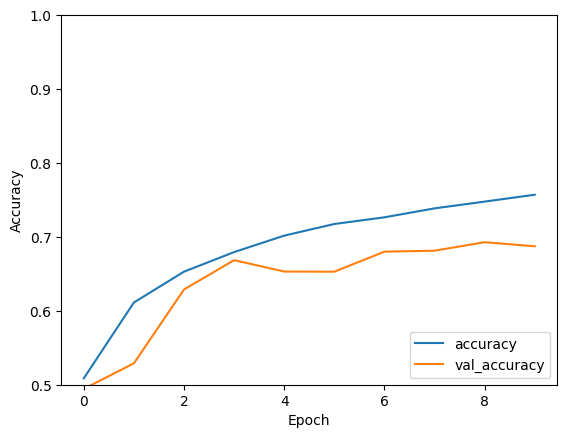

In [ ]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6873000264167786


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

* 모든 CIFAR-10 test 이미지가 "deer"(class 4)로만 예측되는 문제 발생하여,<br>
학습데이터에도 정규화 진행

* 사용한 png 파일 다운로드 : https://hyper-breakfast-e73.notion.site/PNG-238fbcc778da807c93aaeedfb1e32c9c?source=copy_link

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


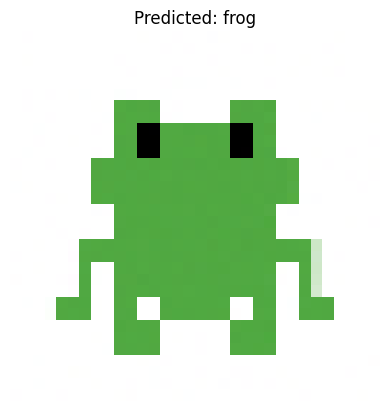

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path = 'gpt_image_frog.png' # 예측할 이미지의 경로 절대경로를 입력하면 됩니다. 뭔가 자신의 얼굴사진을 넣어보면 재미있는일이...
predict_new_image(image_path, model, class_names)

## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: <br>
정규화(Normalization) 과정은 모델의 안정적인 학습을 위해 0에서 1 사이의 실수 범위로 변환하는 전처리 과정이다. 이미지 데이터는 색상 채널(R, G, B)로 구성되며, 각 채널의 픽셀 값은 0부터 255 사이의 정수 값을 갖다. 따라서 0 ~ 255 사이의 값을 0 ~ 1 사이의 범위로 변환하기 위해, 각 픽셀 값을 255.0으로 나누어 정규화한다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer: <br>

inductive bias란, 주어지지 않은 입력의 출력을 예측함으로써 보지 못한 데이터에 대해서도 귀납적 추론이 가능하도록 하는 알고리즘이 전제하는 가정의 집합을 의미한다. 이는 학습 데이터를 넘어 다른 데이터에 대해서도 일반화 할 수 있는 능력을 가진 모델을 만든다. <br>

CNN이 이미지 처리에 적합한 이유는 inductive bias들이 이미지 데이터의 특성과 잘 맞기 떄문이다.
1. Stationarity 가정 부합
- 이미지의 통계적 특성은 전체 공간에서 거의 일정하다.
- ex. '입'이라는 특징은 어느 위치에 있는 CNN 필터로 탐지 가능
2. Locality 가정 부합
- 이미지에서 인접 픽셀들은 관련 정보를 담고 있다.
- CNN은 작은 필터를 통해 이 지역적 정보를 효과적으로 추출한다.
3. Parameter Sharing
- parameter sharing이란, 전체 이미지에 동일한 필터를 반복 사용하는 것으로, MLP 대비 훨씬 적은 파라미터로도 높은 학습 효율이라는 장점을 가진다.
4. Translation Equivariance/Invariance
- 사물이 어느 위치에 있든 CNN은 해당 특성을 감지할 수 있다: Convolution > Equivariance. Pooling > Invariance
- ex. 사람의 눈, 입이 사진 중앙이든 구석이든 CNN은 이를 인식할 수 있음

<br>이러한 inductive bias 덕분에 CNN은 이미지 데이터의 구조적 특성을 잘 반영하며, 적은 데이터와 파라미터로도 높은 일반화 성능을 발휘할 수 있는 이미지 처리에 최적화된 모델이다.